In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the dataset (assuming 'diabetes.csv' as the file name)

diabetes_data = pd.read_csv("diabetes.csv")
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Data Overview
print(diabetes_data.info())  # Display basic information about the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [4]:
# Summary statistics of numeric columns
print(diabetes_data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

# Exploratory Data Analysis (EDA)

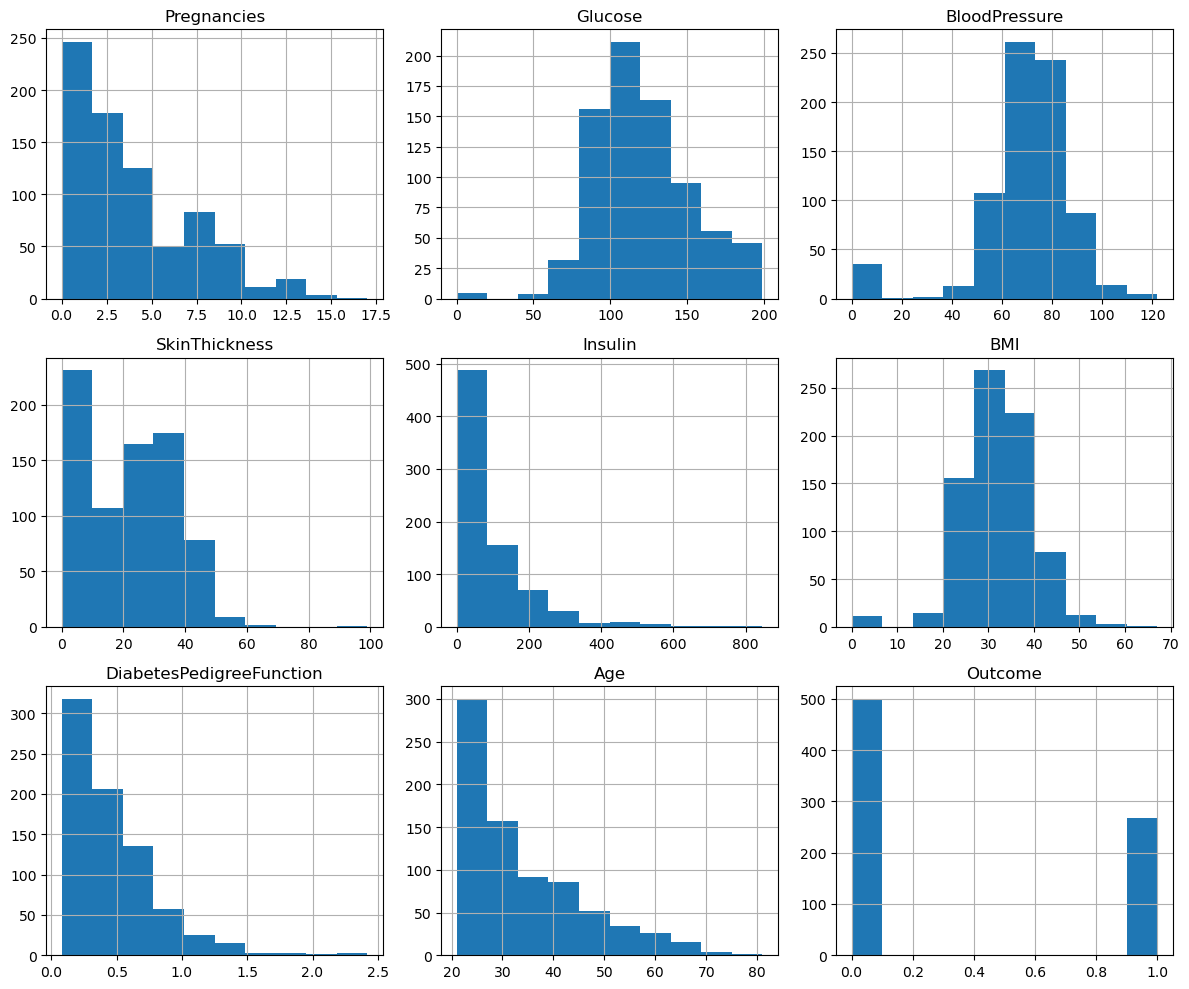

In [5]:
# Visualization: 
# Plotting Histograms of numeric columns

diabetes_data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

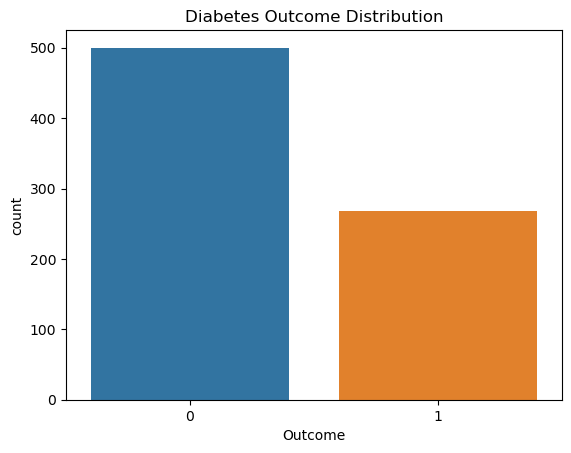

In [6]:
# Visualizing the 'Outcome' distribution (presence/absence of diabetes)

sns.countplot(x='Outcome', data=diabetes_data)
plt.title('Diabetes Outcome Distribution')
plt.show()

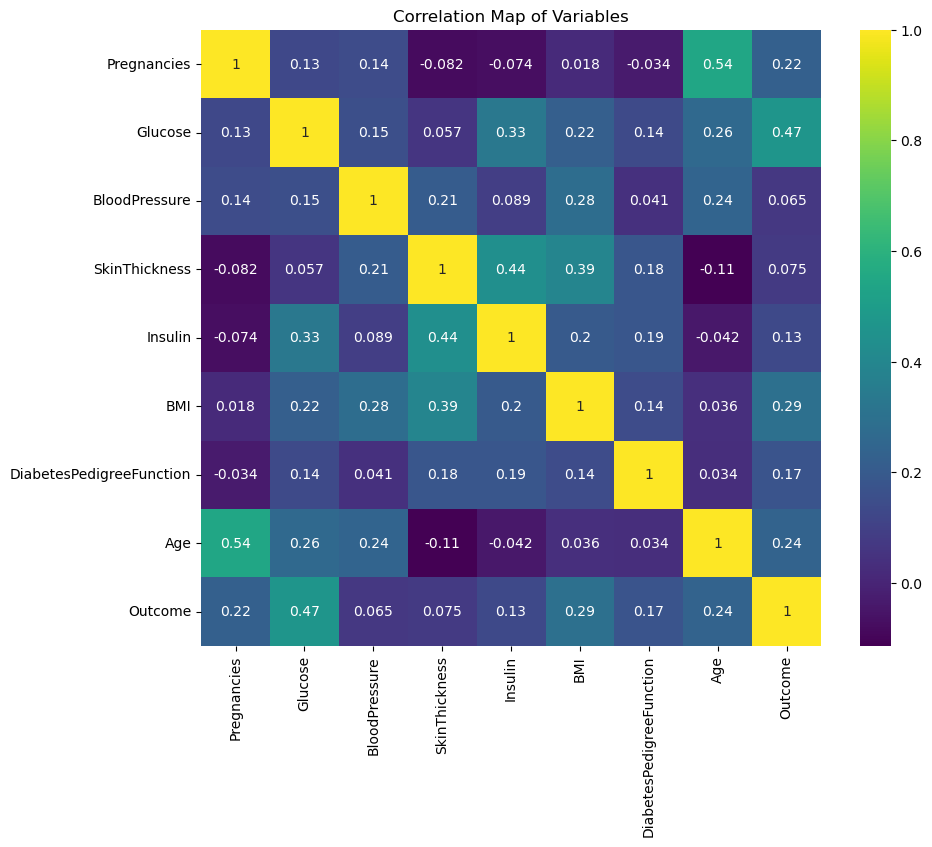

In [8]:
# Correlation Heatmap

correlation_matrix = diabetes_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Map of Variables')
plt.show()

# Predictive Modelling

In [9]:
# Predictive Modeling (example - using Logistic Regression)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [10]:
# Assuming 'Outcome' is the target variable

X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

In [11]:
# Splitting data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Model Training
model = LogisticRegression(max_iter=1000)  # Creating the Logistic Regression model

 # Training the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [13]:
# Model Evaluation

y_pred = model.predict(X_test)  # Making predictions
accuracy = accuracy_score(y_test, y_pred)  # Calculating the accuracy of the Model
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.75


In [14]:
# Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



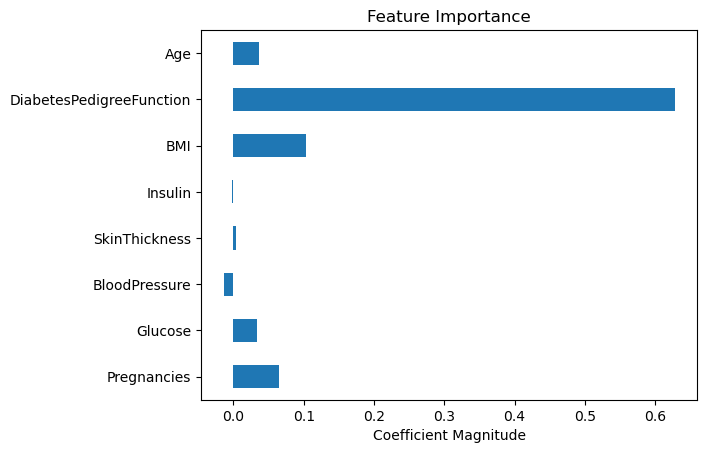

In [15]:
# Feature Importance (coefficients in Logistic Regression)

feature_importance = pd.Series(model.coef_[0], index=X.columns)
feature_importance.plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Coefficient Magnitude')
plt.show()